Predict Red Wine Quality with SVC, Decision Tree and Random Forest

Overview
Dataset from: https://archive.ics.uci.edu/ml/datasets/wine+quality 

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Attribute Information:
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Problem Statement:
As a wine lover, wouldn't it be ideal to know which property affect wine quality? 
What about knowing how else you could increase the "quality" of your wine? As a wine drinker, wouldn't it be insightful to know which characteristics to look out for in a wine when you wish to buy a good wine or as an investment?
Multiple machine learning algorithms are used to determine which physiochemical properties have impact on a wine’s quality.

Based on the above dataset, a predictive model will be created. 
It will then conclude with recommendations on which attribute affect wine quality. 


Import Libraries

In [106]:

import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

Load the dataset

In [107]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

Check if import is done correctly and have a brief look at the data.
Let us do some data exploration as well.
It can also help us with a preview of the dataset for the first 5 rows. 

In [108]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Look through data types and null object
Identify columns which have null values

In [109]:
(data.isnull() | data.empty | data.isna()).sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Seems like we do not have any null,we are good to go with this dataset.

In [110]:
print(data.shape)

(1599, 12)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From this we can see that our data type consist of float64 and int32. Hence they are all numerical data types. We have 12 columns and the last variable, quality, is the score of the wine.
dtypes: float64(11), int32(1)

In [112]:

#Describe data value set 
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From this brief summary, the data seems to be normal with no negative values or any numbers that seem unexpected. 

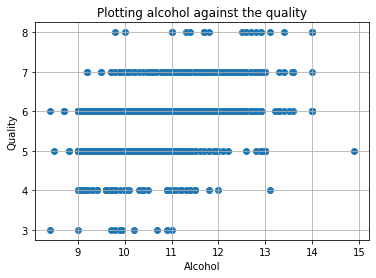

In [113]:
#Let's plot a scatter plot of alcohol against its quality

import matplotlib.pyplot as plt
plt.scatter(data['alcohol'],data['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()

From this brief scatter plot, we can see that at the low end, the quality of alchol seem to be lower. But it also does means that higher alcohol have a linear relationship with the wine quality. 

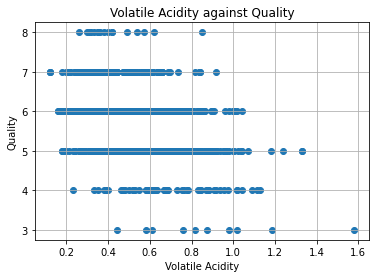

In [114]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(data['volatile acidity'],data['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()

We can see that the higher the alcohol content, the higher the quality?
For volatile acidity, seems like it is scattered around. 

In [115]:
data.corr()
#This gives the pairwise correlation matrix.
#Let us try to identify collinear variables.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [116]:
quality = data['quality'].value_counts()

In [117]:
data['quality'].unique()



array([5, 6, 7, 4, 8, 3], dtype=int64)

In [118]:
data.quality.value_counts().sort_index()


3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

We can see how the data is distributed among the data set.From the value count, we can tell that majority of the wines are in the 5-8 score range. Meaning that it is above average or good. 

<AxesSubplot:xlabel='quality', ylabel='count'>

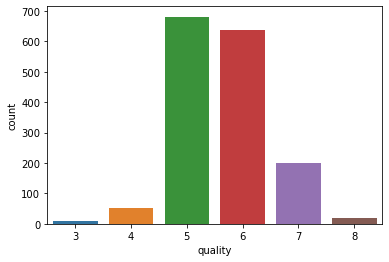

In [119]:
sns.countplot(x='quality', data=data)


Plot to see how the quality score is being spread out in a bar chart. Seems like majority is average and most of the score is within 5-6. 

<AxesSubplot:>

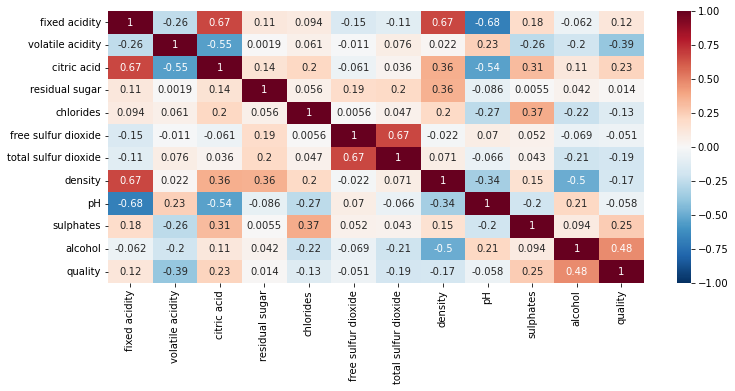

In [120]:
correlation = data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

From the correaltion plot we can see there are some highly correlated variables.
Example like fixed acidity,citric acid will affect the pH value of the wine. 

There is a positive correlation of 0.67 between the “fixed acidity” variable and the variables “citric acid” and “density”. 

Hence, “fixed acidity” variable increases the “citric acid” will also increase. 
This will also apply to the relationship between “free sulfur dioxide” and “total sulfur dioxide” variables.

Variables like “fixed acidity” and “pH” have a negative linear correlation of -0.68. This relationship indicates that when the fixed acidity of the wine increases, the pH value of the wine decreases. 


In [121]:
correlation['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Seems like alcohol is the highest impact, let do a box plot to see if the amount of alcohol content affect wine quality

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

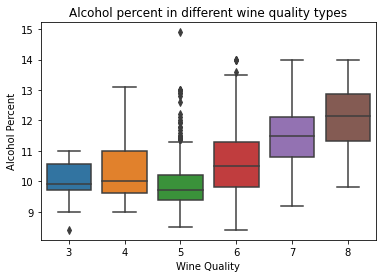

In [122]:
bx = sns.boxplot(x="quality", y='alcohol', data = data)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

From the graph, we can see that alcohol is most strongly correlated with quality, and the correlation is positive. Let’s dive deeper to see the variations in alcohol levels for wines of different qualities using a bar graph.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


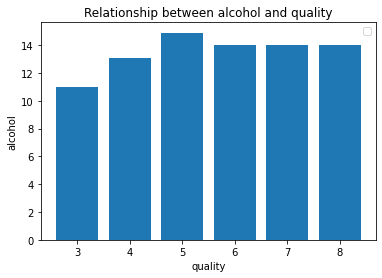

In [123]:
plt.bar(data['quality'], data['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(data)
normal_df = pd.DataFrame(normal_df, columns = data.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

Let's do some plotting to know how the data columns are distributed in the dataset


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

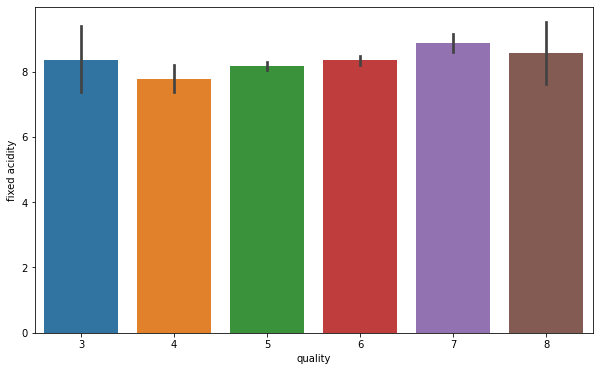

In [125]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)


In [126]:
#Fixed acidity seems fairly constant in terms of quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

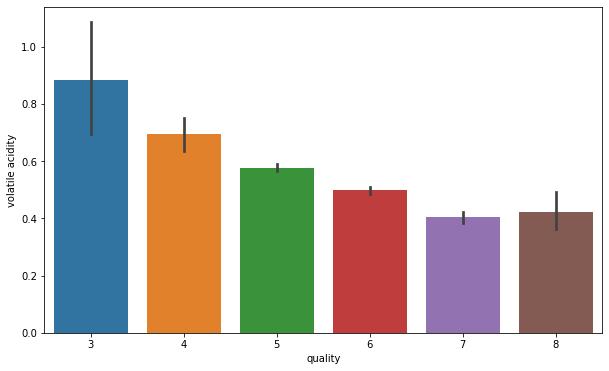

In [127]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)


In [128]:
#We can see that volatitle acidity decreases with an increase in wine quality. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

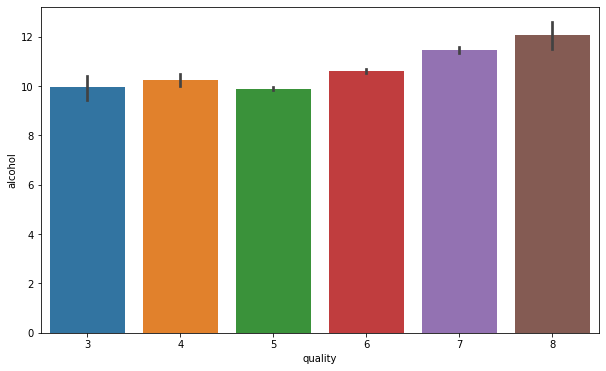

In [129]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [130]:
#Alcohol level also goes higher as the quality of wine increases


In [131]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Let us do some binary classificaion for the response variable.
In this case, we are dividing wine as good and bad by giving the limit for the quality. 

Binning or grouping data (sometimes called quantization) is an important tool in preparing numerical data for machine learning. It's useful in scenarios like these:

A column of continuous numbers has too many unique values to model effectively. So we can  manually assign the values to groups, to create a smaller set of discrete ranges.

In [132]:
#Binning is a way to group a number of more or less continuous values into a smaller number of "bins".
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [133]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [134]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [135]:
data['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

C:\Users\icyro\anaconda3\envs\xyz\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

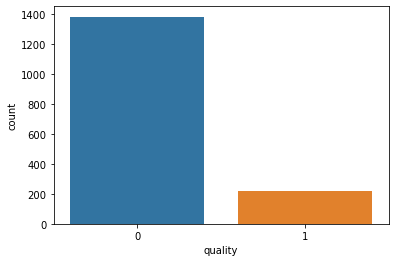

In [136]:
sns.countplot(data['quality'])


In [137]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('quality', axis = 1)
y = data['quality']

In [138]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [139]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

Our training and testing data is ready now to perform machine learning algorithm


In [140]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [141]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [142]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [143]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 29  18]]


Stochastic Gradient Decent Classifier


In [144]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [145]:
print(classification_report(y_test, pred_sgd))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\icyro\anaconda3\envs\xyz\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icyro\anaconda3\envs\xyz\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icyro\anaconda3\envs\xyz\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are able to get around 82% accuracy using Stochastic Gradient Decent.

In [146]:
print(confusion_matrix(y_test, pred_sgd))


[[273   0]
 [ 47   0]]


Support Vector Classifier


In [147]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [148]:
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support vector classifier gets 86%


KNN (K-nearest neighbour)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))

0.86875


Logistic Regression


In [150]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(accuracy_score(y_test, pred_logreg))

0.875


Random Forest


In [151]:
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))

0.865625


We can introduce some random state reduce overfitting.Accuracy seemed to improve after this is being implemented. 

In [154]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


 1) alcohol                        0.271511
 2) sulphates                      0.158944
 3) volatile acidity               0.116874
 4) total sulfur dioxide           0.080655
 5) free sulfur dioxide            0.060582
 6) fixed acidity                  0.059063
 7) citric acid                    0.057422
 8) residual sugar                 0.053499
 9) chlorides                      0.052390
10) pH                             0.048853
11) density                        0.040207


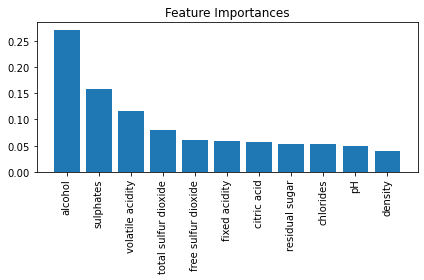

In [153]:
importances = rfc.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

Below show which features are important in the prediction.
 1) alcohol                        0.266831
 2) sulphates                      0.150760
 3) volatile acidity               0.119571
 4) total sulfur dioxide           0.077491
 5) free sulfur dioxide            0.058210
 6) citric acid                    0.057109
 7) chlorides                      0.056988
 8) density                        0.054672
 9) residual sugar                 0.054107
10) fixed acidity                  0.053764
11) pH                             0.050497

From the Random Forest Classifier, we can see which feature is important in the prediction. It will help us in making decision and also for wine makers to take into consideration when making wines.